In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.optimize import newton 

In [3]:
student_number = 15655200
np.random.seed(student_number)
g0 = np.random.uniform(1,2)
A0 = np.random.rand()
s = np.random.uniform(0.5, 1.5)
print(g0, A0, s)

1.1143123187976574 0.9652330390814144 1.1292321723475864


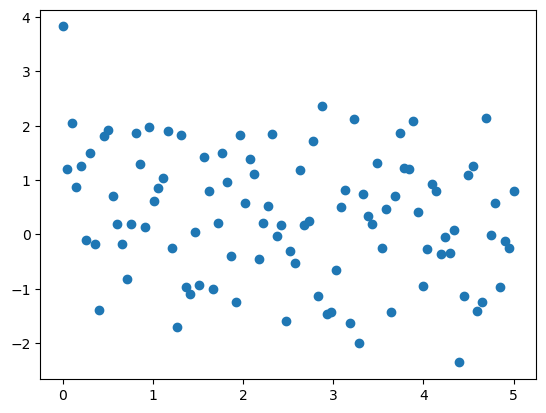

In [4]:
def line(A, g, t):
    return A*np.exp(-g*t)

def data(start, end, N, A = A0, g = g0, sigma = s):
    time = np.linspace(start,end, N)
    data = line(A, g, time) + sigma*np.random.randn(N)
    return time, data


t0, tend, N = 0, 5, 100
t1, d1 = data(t0, tend, 100)

plt.scatter(t1, d1)
plt.show()


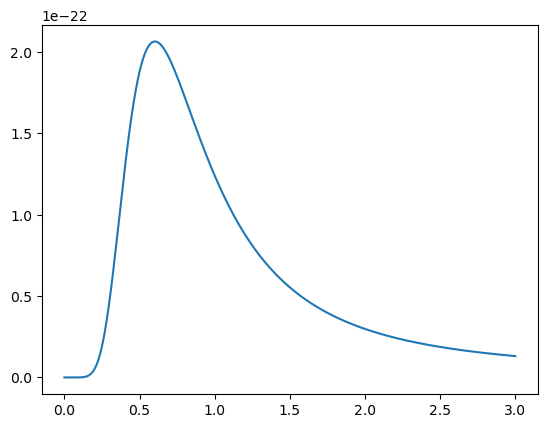

In [5]:
def Pos_line(data, A, g, t, sigma = s):
    noise2 = ((data - A*np.exp(-g*t))**2).sum()
    return np.exp(-noise2/(2*sigma**2))

pnt = 2000

g_r = np.linspace(0, 3, pnt)
Pos_r = np.zeros(pnt)
for i in range(pnt):
    Pos_r[i] = Pos_line(d1, A0, g_r[i], t1)
plt.plot(g_r, Pos_r)
plt.show()

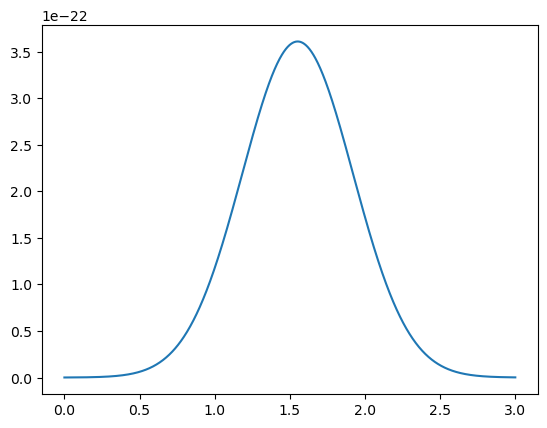

In [6]:
A_r = np.linspace(0, 3, pnt)
Pos_r = np.zeros(pnt)
for i in range(pnt):
    Pos_r[i] = Pos_line(d1, A_r[i], g0, t1)
plt.plot(A_r, Pos_r)
plt.show()

In [12]:
def chi_line(data, A, g, t, sigma = s):
    noise2 = ((data - A*np.exp(-g*t))**2).sum()
    return noise2/(sigma**2)

print(chi_line(d1, A0, g0, t1))

101.28028953613614


1.613742239789833 1.2101493326852069


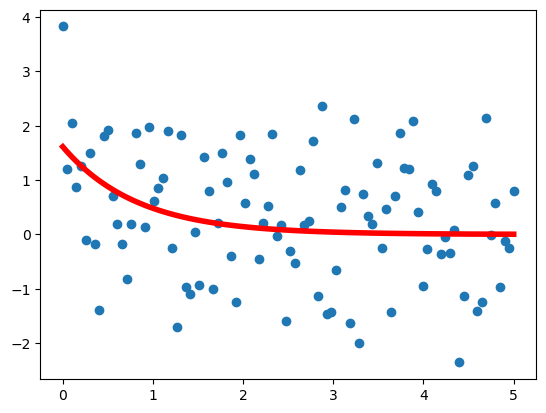

In [ ]:
line_sol = minimize(lambda X:chi_line(d1, X[0], X[1], t1), [A0, 0], method="Nelder-Mead", tol=1e-6)['x']
plt.scatter(t1, d1)
print(line_sol[0], line_sol[1])
plt.plot(t1, line_sol[0]*np.exp(-line_sol[1]*t1), lw=4, color = "red")
plt.show()

98.73721571883131


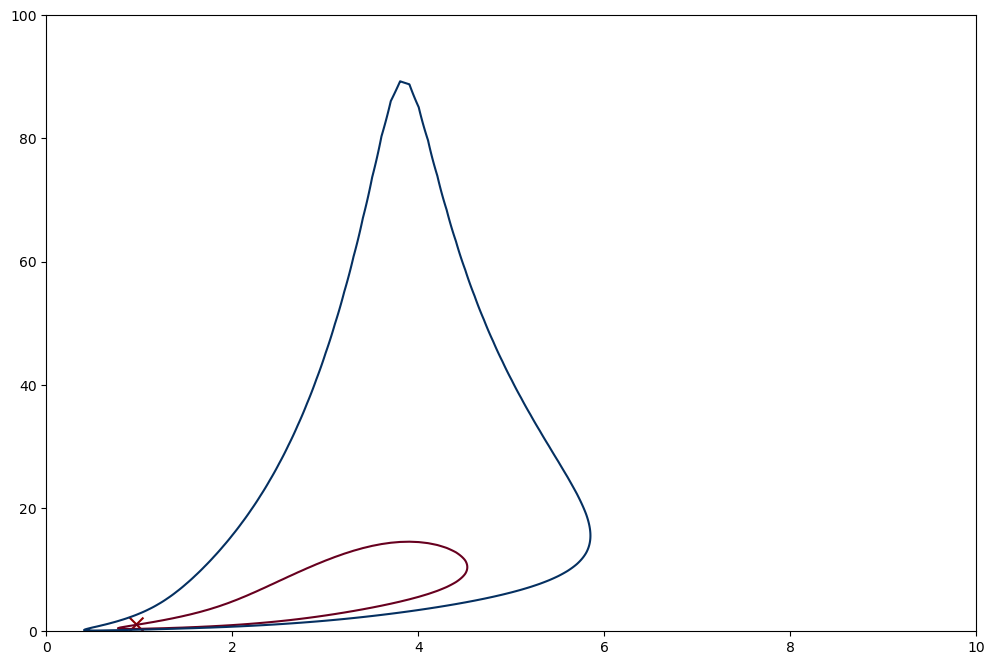

In [ ]:
chi_min_line=chi_line(d1,line_sol[0],line_sol[1],t1)
print(chi_min_line)

A_r = np.linspace(0, 100 , pnt)
g_r = np.linspace(0, 100 , pnt)

A, B = np.meshgrid(A_r, g_r)
logP=np.zeros(A.shape)
for i in range(pnt):
    for j in range(pnt):
        logP[i,j]=chi_line(d1,A[i,j],B[i,j],t1)

fig,ax=plt.subplots(figsize=(12,8))
ax.contour(A,B,logP,cmap='RdBu',levels=[chi_min_line+2.30,chi_min_line+6.18])
ax.set_xlim(0,10)
ax.set_ylim(0,100)
ax.scatter(A0,g0,marker='x',s=100,color='darkred')
plt.show()

# 3a

$$ \langle \chi^{2}_{min}\rangle = \sum_{i=0}^{N-1} \frac{1}{\sigma^2}\int_{-\infty}^{\infty} x^2*norm(\mu=0, \sigma=\sigma) dx$$
Since the mean of the normal is zero, the integral can be simplifed as followed:
$$\int_{-\infty}^{\infty} x^2*norm(\mu=0, \sigma=\sigma) dx  = \langle x^2 \rangle - \langle x \rangle^2 = \sigma^2$$
plugging this back in, we get
$$\sum_{i=0}^{N-1} 1 = N $$

# 3b

The property of the chi-square distribution dictates that the mean is its degree of freedom. In this problem, the degree of freedom is 
$$m+1-1=m$$
We can thus calculate 
$$\sigma_{\chi^2}^2 = \langle (\chi^2)^2 - 2\chi^2*\langle \chi_{min}^2 \rangle + \langle \chi_{min}^2 \rangle^2\rangle$$
which is
$$\langle (\chi^2)^2\rangle - 2\langle \chi^2 \rangle \langle \chi_{min}^2 \rangle + \langle \chi_{min}^2 \rangle^2 = m^2 - 2mN + N^2$$
This quantity gives us information about if we repeat the same generation with the same noise source many times, the variation between samples will be govern by the above quantity.

# 3c

In [22]:
t0, tend, N = 0, 5, 100
t2, d2 = data(t0, tend, 100, sigma = 0.5)
t3, d3 = data(t0, tend, 100, sigma = 1.5)
t4, d4 = data(t0, tend, 100, sigma = 2)

print(chi_line(d2, A0, g0, t2, sigma = 0.5))
print(chi_line(d3, A0, g0, t3, sigma = 1.5))
print(chi_line(d4, A0, g0, t4, sigma = 2))

105.70889260177715
96.8341475175958
101.75025438819391
